## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [80]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [81]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
# print(data)

784594


In [82]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'n00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'n00015388_671\thttp://farm4.static.flickr.com/3217/294261

## 將 txt 轉成 pandas dataframe

In [83]:
import numpy as np
import pandas as pd

# 原始解法
# arrange_data = {'idx': [],
#                 'link': []
#                }
# for s in data:
#     tmp = s.split('\t')
#     i, l = np.nan, np.nan
#     if len(tmp) == 2:
#         i, l = tmp[0], tmp[1]
#     elif len(tmp) == 1:
#         if 'http' in tmp[0]:
#             l = tmp[0]
#         else:
#             i = tmp[0]
#     arrange_data['idx'].append(i)
#     arrange_data['link'].append(l)
    
## 檢討，官方答案
arrange_data = []
for d in data:
    line = d.split('\t')
    arrange_data.append(line)

print(arrange_data)
df = pd.DataFrame(arrange_data, columns=['idx', 'link'])

[['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'], ['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'], ['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'], ['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'], ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'], ['n00015388_379', 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'], ['n00015388_388', 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'], ['n00015388_442', 'http://www.porschemania.it/discus/messages/815/102099.jpg'], ['n00015388_474', 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'], ['n00015388_514', 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg'], ['n00015388_671', 'http:/

In [84]:
df.head()

,idx,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [85]:
# 自己埋漏洞
df['idx'][1] = np.nan
df['link'][2] = np.nan
df.head()

,idx,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,NaN,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,NaN
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [86]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 自己dropna
df = df.dropna()
df.head()

,idx,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...


In [87]:
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]
print(first_link)

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


(435, 499, 3)


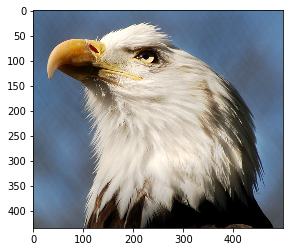

In [88]:
response = requests.get(first_link)

# 記一下
img = Image.open(BytesIO(response.content))

# Convert img to numpy array，下面兩行加不加感覺都沒影響
img = np.array(img)
print(img.shape)

plt.imshow(img)
plt.show()

In [92]:
# def img2arr_fromURLs(url_list, resize = False):
#     img_list = []
   
#     for u in url_list:
#         print(u)
#         res = requests.get(u)
#         try:
#             img = Image.open(BytesIO(res.content))
#         except Exception as e:
#             print(e)
#         else:
#             img_list.append(img)

#     return img_list

## 解答檢討
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((128,128)) # 假如 resize, 就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass
    
    return img_list

Total images that we got: 5 


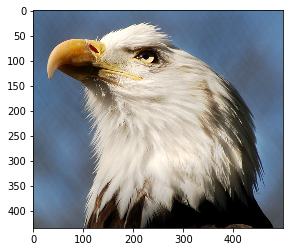

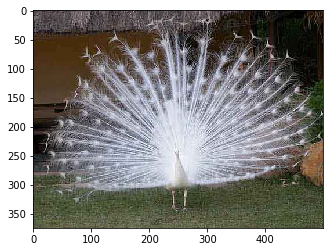

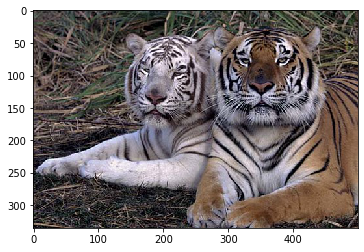

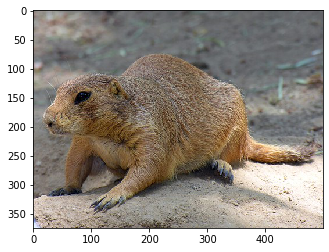

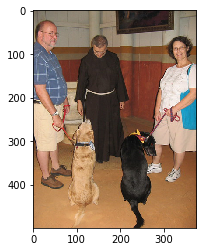

In [90]:
num_to_open = 10 # 要開幾個連結
result = img2arr_fromURLs(df.iloc[0:num_to_open]['link'].values)

print("Total images that we got: %i " % len(result)) # 如果不等於 num_to_open, 代表有些連結失效囉 # %i, %d不太一樣

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 5 


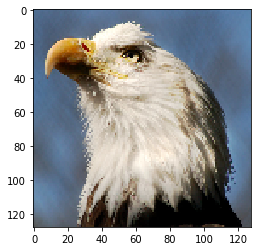

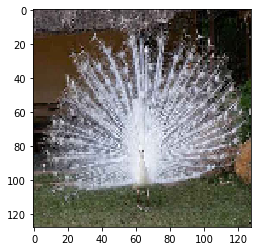

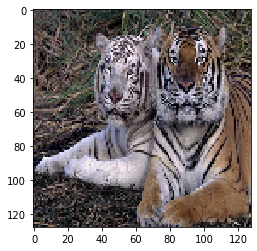

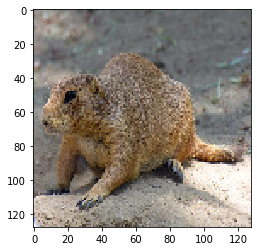

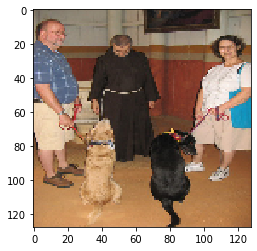

In [93]:
num_to_open = 10 # 要開幾個連結
result = img2arr_fromURLs(df.iloc[0:num_to_open]['link'].values, resize=True)

print("Total images that we got: %i " % len(result)) # 如果不等於 num_to_open, 代表有些連結失效囉 # %i, %d不太一樣

for im_get in result:
    plt.imshow(im_get)
    plt.show()